In [1]:
"""
This notebook is published for the purpose of illustrating the theory and algorithm developed in 

Calmon, L., Schaub, M.T. and Bianconi, G. (2023) 
‘Dirac signal processing of higher-order topological signals’, 
New Journal of Physics, 25(9), p. 093013. 
doi:10.1088/1367-2630/acf33c.

Data loaded in this notebook can be downloaded at https://manliodedomenico.com/data.php

Please cite the following references when using and modifying this code:

[1] Calmon, L., Schaub, M.T. and Bianconi, G. (2023) 
‘Dirac signal processing of higher-order topological signals’, 
New Journal of Physics, 25(9), p. 093013. 
doi:10.1088/1367-2630/acf33c.

[3] JF Padgett, CK Ansell - "Robust Action and the Rise of the Medici, 1400-1434". American journal of sociology, 1259-1319 (1993) 

[4] https://manliodedomenico.com/data.php
"""

#Import of packages
import pandas as pd
import math
import scipy
import scipy.stats
import numpy as np
import random
import palettable
# setup plotting tools
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec as GS
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
from scipy.sparse.linalg import eigsh
from sympy import *
from numpy.linalg import inv
import itertools
from itertools import groupby
from functools import reduce
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
import operator
from operator import itemgetter
from scipy.spatial import Delaunay
import networkx as nx
from scipy.sparse import csr_matrix
from scipy.sparse import csc_matrix
from matplotlib.patches import Polygon
from pylab import rcParams
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline

%run -i ../Functions_Dirac_signal_proc.py


/Users/admin/Dropbox/PhD/Dirac_Signal_processing/code m/github/Functions_Dirac_signal_proc.py:287: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  def plot_NL(s,list_edges, list_triangle, pos, ax, norm, the_map = mpl.cm.get_cmap('coolwarm'), edge_width_factor = 20):


In [2]:
## load data
df = pd.read_csv("Padgett-Florentine-Families_multiplex.edges", sep=" ", header=None, 
                 names=["layerID", "node1", "node2","weight"])

b1= df[df['layerID'] == 1] #selects layer 1 (marriage)
edge_list1 =b1[['node1', 'node2']].copy()

G = nx.Graph()
G.add_edges_from(edge_list1.values)
G.nodes()
G = nx.convert_node_labels_to_integers(G,1) #ensures nodes labelled as adjacent integers from 1
edge_list = list(G.edges())

N=G.number_of_nodes()
L = len(edge_list)


In [3]:
B1 = get_B1(edge_list)
#create Dirac operator
D = np.block([[np.zeros((N,N)),B1],
            [B1.transpose(),np.zeros((L,L))]])

#eigenvector decomposition
w, v = np.linalg.eigh(D)
vinv = np.linalg.inv(v)

# Figure 1

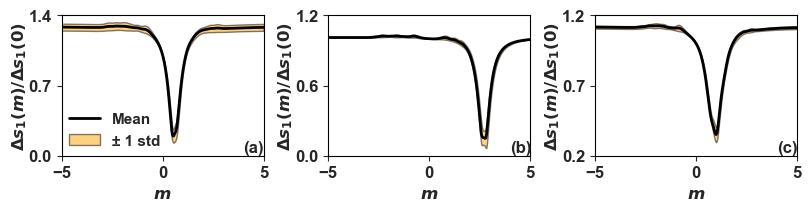

In [4]:
"""
Computes a mass sweep for signals built from different eigenvectors of the Dirac, averaged over different iterations of noise
"""
%matplotlib inline
from matplotlib import ticker as tk

rcParams['lines.linewidth'] = 2
font = {'weight' : 'bold',
        'size'   : 12}
Nit=20
matplotlib.rc('font', **font)
fig = plt.figure(figsize = (8, 2), constrained_layout=True)

gs = GS(1, 3, figure=fig, left=0.05, right=0.2, wspace=0.0, hspace=0)
ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=1))
ax2 = plt.subplot(gs.new_subplotspec((0, 1), colspan=1))
ax3 = plt.subplot(gs.new_subplotspec((0, 2), colspan=1))

## Minimum eigenvector of the Dirac
error_avg, error_std, mass_avg, mass_std, list_mass = mass_sweep_avg_ratio(x_min=True, gamma=10, beta=0.6, Nit=Nit, w=w, v=v, vinv=vinv, D=D, gaussian = False)

ax1.plot(list_mass,error_avg,'k', label = 'Mean')
ax1.fill_between(list_mass, error_avg-error_std,error_avg+error_std, color='orange', edgecolor = 'black', alpha=0.5,label = '± 1 std')
ax1.set_ylim([0,1.4])
ax1.yaxis.set_major_locator(plt.LinearLocator(8))
#ax1.yaxis.set_ticks(format = '%.1f')

#Maximum eigenvector of the Dirac
error_avg, error_std, mass_avg, mass_std,list_mass = mass_sweep_avg_ratio(x_min=False, gamma=10, beta=0.6, Nit=Nit, w=w, v=v, vinv=vinv, D=D, gaussian = False)
ax2.plot(list_mass,error_avg,'k', label = 'Mean')
ax2.fill_between(list_mass, error_avg-error_std,error_avg+error_std, color='orange', edgecolor = 'black', alpha=0.5,label = '± 1 std')
ax2.set_ylim([0,1.2])
ax2.yaxis.set_major_locator(plt.LinearLocator(4))

#Gaussian superposition of signals.
error_avg, error_std, mass_avg, mass_std,list_mass = mass_sweep_avg_ratio(x_min=False, gamma=10, beta=0.6, Nit=Nit, w=w, v=v, vinv=vinv, D=D, gaussian = True)
ax3.plot(list_mass,error_avg,'k', label = 'Mean')
ax3.fill_between(list_mass, error_avg-error_std,error_avg+error_std, color='orange', edgecolor = 'black', alpha=0.5,label = '± 1 std')
ax3.set_ylim([0.2,1.2])
ax3.yaxis.set_major_locator(plt.LinearLocator(6))

ax1.annotate('(a)',xy = (0.9, 0.025), xycoords = 'axes fraction')
ax2.annotate('(b)',xy = (0.9, 0.025), xycoords = 'axes fraction')
ax3.annotate('(c)',xy = (0.9, 0.025), xycoords = 'axes fraction')

for ax in [ax1,ax2, ax3]:
    ax.set_xlabel('$m$')
    ax.set_ylabel('$\Delta s_1(m)/\Delta s_1(0)$',labelpad =0)
    ax.tick_params('both',direction='out', labelsize =12, bottom=True, top=False, left=True, right=False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.set_xlim([-5,5])
    ax.yaxis.set_major_locator(plt.LinearLocator(3))
    ax.xaxis.set_major_locator(plt.LinearLocator(3))

ax1.legend(frameon=False, borderpad= 0,loc=3, fontsize = 11)


# Figure 2

3.9166323643317917 0.5972595991851712 0.1792921138709864 0.5052933653352533
4.023699617490807 2.694053395347621 0.09042022566804886 0.4985253236680745
3.502956042192789 0.9335168651921057 0.2664094351111221 0.5342969022758938


/var/folders/pq/mypssjvs1xs0k9vkzrrw07b00000gn/T/ipykernel_18963/3841226293.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.1f}'.format(x) for x in tickvals])
/var/folders/pq/mypssjvs1xs0k9vkzrrw07b00000gn/T/ipykernel_18963/3841226293.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.1f}'.format(x) for x in tickvals])
/var/folders/pq/mypssjvs1xs0k9vkzrrw07b00000gn/T/ipykernel_18963/3841226293.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.1f}'.format(x) for x in tickvals])
/var/folders/pq/mypssjvs1xs0k9vkzrrw07b00000gn/T/ipykernel_18963/3841226293.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tic

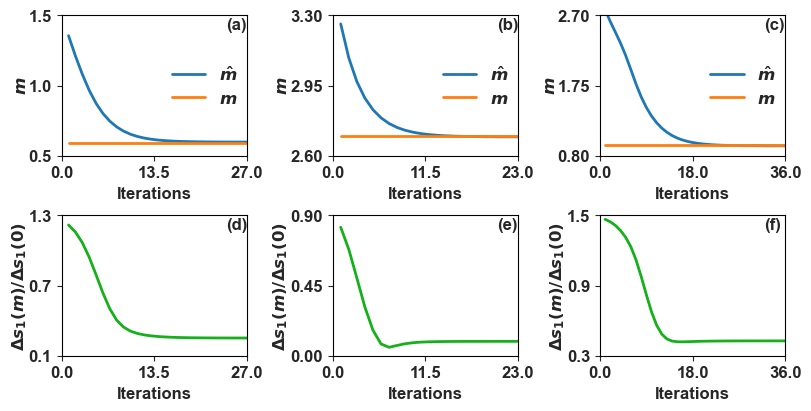

In [22]:
"""
Single iteration relativer error and convergence of m over the iterations of the algorithm
"""
%matplotlib inline
rcParams['lines.linewidth'] = 2
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

fig = plt.figure(figsize = (8, 4), constrained_layout=True)

gs = GS(2, 3, figure=fig, left=0.05, right=0.2, wspace=0.0, hspace=0)

ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=1))
ax2 = plt.subplot(gs.new_subplotspec((0, 1), colspan=1))
ax3 = plt.subplot(gs.new_subplotspec((0, 2), colspan=1))
axtop = [ax1,ax2,ax3]
    
ax4 = plt.subplot(gs.new_subplotspec((1, 0), colspan=1))
ax5 = plt.subplot(gs.new_subplotspec((1, 1), colspan=1))
ax6 = plt.subplot(gs.new_subplotspec((1, 2), colspan=1))
axbot = [ax4,ax5,ax6]

#array of parameters for different subplots
x_min = [True, False, False]
gaussian = [False, False, True]
gamma= [7, 7, 2] 
m_0 = [1.5,3.5,3]

ax1.annotate('(a)',xy = (0.885, 0.9), xycoords = 'axes fraction')
ax2.annotate('(b)',xy = (0.885, 0.9), xycoords = 'axes fraction')
ax3.annotate('(c)',xy = (0.885, 0.9), xycoords = 'axes fraction')
ax4.annotate('(d)',xy = (0.885, 0.9), xycoords = 'axes fraction')
ax5.annotate('(e)',xy = (0.885, 0.9), xycoords = 'axes fraction')
ax6.annotate('(f)',xy = (0.885, 0.9), xycoords = 'axes fraction')

for i in [0,1,2]:
    
    s_true, s_noisy, m_target, snr = build_signals(w,v,D,x_min[i],0.5, gaussian[i]) #obtain the signals starting from the Dirac
    error_0=np.linalg.norm(s_true-s_noisy) #initial error
    list_m, list_error_m, list_it, m, s_est_m = optimize_m(w,v,vinv,D,s_noisy,s_true,m_0[i],gamma[i],0.0001, epsilon =0.3) #optimise m
    s_est = process(w, v, vinv, s_noisy, 0, gamma[i]) # decoupled processing
    error_decoupled = np.linalg.norm(s_true - s_est) #error with decoupled processing
    print(snr,m, np.linalg.norm(s_est_m - s_true), error_0)
    axtop[i].plot(list_it,list_m,label='$\hat{m}$')
    axtop[i].plot(list_it,m_target*np.ones(np.shape(list_it)[0]),label='$m$')
    axbot[i].plot(list_it, list_error_m/error_decoupled, 'xkcd:green')
    axtop[i].set_ylabel('$m$',labelpad =0)
    axbot[i].set_ylabel('$\Delta s_1(m)/\Delta s_1(0)$',labelpad =0)
    axtop[i].legend(frameon=false, borderpad= 0.1, fontsize = 12, loc = 5)
    axtop[i].set_xlim([0,max(list_it)])
    axbot[i].set_xlim([0,max(list_it)])
    
ax1.set_ylim([0.5,1.5])
ax2.set_ylim([2.6,3.3])
ax3.set_ylim([0.8,2.7])
ax4.set_ylim([0.1, 1.3])
ax5.set_ylim([0, 0.9])
ax6.set_ylim([0.3, 1.5])

for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.tick_params('both',direction='out', labelsize =12, bottom=True, top=False, left=True, right=False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.yaxis.set_major_locator(plt.LinearLocator(3))
    ax.xaxis.set_major_locator(plt.LinearLocator(3))
    #tickvals = ax.get_yticks()
    #ax.set_yticklabels(['{:,.1f}'.format(x) for x in tickvals])
    tickvals = ax.get_xticks()
    ax.set_xticklabels(['{:,.1f}'.format(x) for x in tickvals])
    ax.set_xlabel('Iterations', fontweight = 'bold')


In [23]:
#edit limits if needed
ax6.set_ylim([0.1, 1.5])
ax6.yaxis.set_major_locator(plt.LinearLocator(3))

for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:   
    tickvals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0f}'.format(x) for x in tickvals])


/var/folders/pq/mypssjvs1xs0k9vkzrrw07b00000gn/T/ipykernel_18963/2122480718.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.0f}'.format(x) for x in tickvals])
/var/folders/pq/mypssjvs1xs0k9vkzrrw07b00000gn/T/ipykernel_18963/2122480718.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.0f}'.format(x) for x in tickvals])
/var/folders/pq/mypssjvs1xs0k9vkzrrw07b00000gn/T/ipykernel_18963/2122480718.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.0f}'.format(x) for x in tickvals])
/var/folders/pq/mypssjvs1xs0k9vkzrrw07b00000gn/T/ipykernel_18963/2122480718.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks()

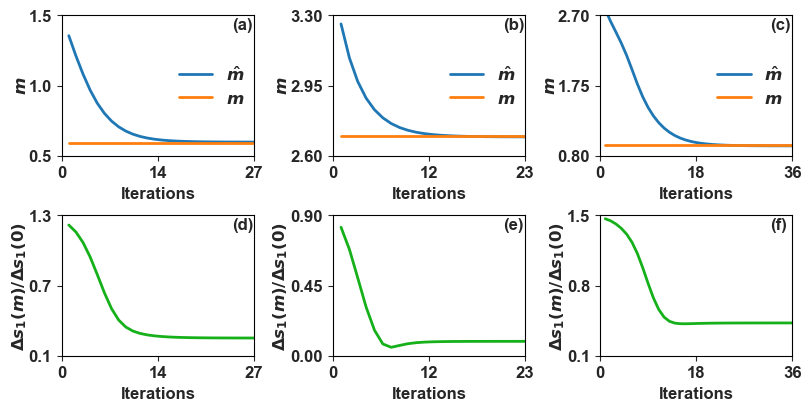

In [24]:
fig

# Visualisations


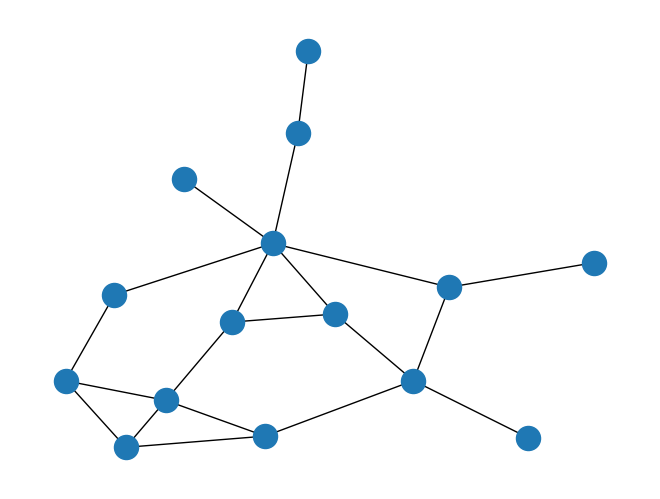

In [25]:
#coordinates used
pos={1: [-0.23463711,  0.49305879],
 2: [-0.03833291,  0.2413796],
 3: [0.35243295, 0.06870041],
 4: [0.67437449, 0.16552315],
 5: [ 0.27313094, -0.29900919],
 6: [-0.3892106 ,  0.03875783],
 7: [-0.49764897, -0.29962691],
 8: [-0.05534147, -0.51756731],
 9: [-0.36431697, -0.5617507 ],
 10: [-0.27554628, -0.37684649],
 11: [ 0.52746034, -0.52389144],
 12: [ 0.09921532, -0.03694457],
 13: [-0.12901415, -0.06860885],
 14: [0.01710577, 0.67682566],
 15: [0.04032863, 1.        ]}
nx.draw(G,pos)

In [26]:
# definition of the signal
beta=0.6
s_true, s_noisy, m_target,snr = build_signals(w,v,D,x_min = True, beta=beta, gaussian=False)

#optimisation parameters
gamma=10
tol = 0.0001
m_0= 0.5
eps = 0.1
#optimisation
list_m, list_error_m, list_it, m, s_est_m = optimize_m(w,v,vinv,D,s_noisy,s_true,m_0,gamma,tol,epsilon = eps)

2.719983819774463 0.6 10 0.0001 0.5 0.12530940552050066


/Users/admin/Dropbox/PhD/Dirac_Signal_processing/code m/github/Functions_Dirac_signal_proc.py:353: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  def xy_to_long_lattitude(a):


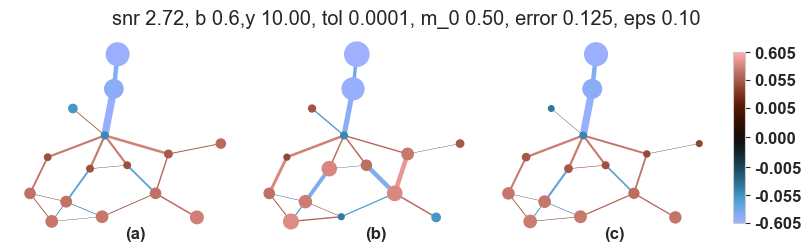

In [27]:
%matplotlib inline
import palettable

plot_func = plot_NL
low, *_, high = sorted((np.concatenate((s_true,s_est_m,s_noisy)))) #min and max to fix the colormap normalisation once for all signals plotted
faces = [] #no triangles

rcParams['lines.linewidth'] = 2
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

if low == 0: #when plotting the error signal
        the_map = mpl.cm.get_cmap('Reds')
        norm = mpl.colors.Normalize(vmin=0, vmax=high, clip=True)
    
else:#map and normalisation definition:
    norm = mpl.colors.SymLogNorm(linthresh = 0.005, linscale = 1, vmin=-max(abs(low),high), vmax=max(abs(low),high), clip = True,base = 10)
    the_map = palettable.scientific.diverging.Berlin_20.mpl_colormap

fig = plt.figure(figsize = (8, 2.4), constrained_layout=True)

gs = GS(1, 3, figure=fig, left=0.02, right=0.2, wspace=0.0, hspace=0)
ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=1))
ax2 = plt.subplot(gs.new_subplotspec((0, 1), colspan=1))
ax3 = plt.subplot(gs.new_subplotspec((0, 2), colspan=1))

plot_func(s_true, edge_list, faces, pos, ax1, norm, the_map, edge_width_factor = 10)
mapper = plot_func(s_noisy, edge_list, faces, pos, ax2, norm, the_map, edge_width_factor=10)
plot_func(s_est_m, edge_list, faces, pos, ax3, norm, the_map, edge_width_factor = 10)

ax1.annotate('(a)',xy = (0.5, 0.005), xycoords = 'axes fraction')
ax2.annotate('(b)',xy = (0.5, 0.005), xycoords = 'axes fraction')
ax3.annotate('(c)',xy = (0.5, 0.005), xycoords = 'axes fraction')

cax = ax3.inset_axes([1.06, 0.08, 0.05, 0.845])

if low==0:
    plt.colorbar(mapper, ticks = np.linspace(low,high,5),format = '%.2f')
else:
    ticks= np.concatenate((-np.geomspace(0.005, max(abs(low),high), 3)[::-1], [0], np.geomspace(0.005, max(abs(low),high), 3)))
    color_bar = plt.colorbar(mapper, ticks = ticks, cmap = the_map, norm = norm, cax = cax, spacing = 'uniform', format = '%.3f')

color_bar.ax.minorticks_off()
    
fig.suptitle('snr %.2f, b %.1f,y %.2f, tol %.4f, m_0 %.2f, error %.3f, eps %.2f' %(snr, beta, gamma, tol, m_0, np.linalg.norm(s_true-s_est_m), eps))
print(snr, beta, gamma, tol, m_0, np.linalg.norm(s_true-s_est_m))